<a href="https://colab.research.google.com/github/paulopestanajunior/case_airbnb/blob/main/Case_Airbnb_Analisando_os_Dados_do_Airbnb_(Rio_de_Janeiro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [312]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [313]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv")


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do anfitrião do  `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que a propriedade possui nos últimos 12 meses
* `license` - A licença/autorização/número de registro do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [314]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.97,-43.18,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98,-43.20,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.98,-43.19,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.99,-43.19,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98,-43.19,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN


Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [315]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24549
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as colunas `neighbourhood_group` e `license` possuem 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 40% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [316]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.00e+00
neighbourhood_group               1.00e+00
reviews_per_month                 3.65e-01
last_review                       3.65e-01
name                              8.55e-04
host_name                         6.11e-04
number_of_reviews                 0.00e+00
number_of_reviews_ltm             0.00e+00
availability_365                  0.00e+00
calculated_host_listings_count    0.00e+00
id                                0.00e+00
minimum_nights                    0.00e+00
room_type                         0.00e+00
longitude                         0.00e+00
latitude                          0.00e+00
neighbourhood                     0.00e+00
host_id                           0.00e+00
price                             0.00e+00
dtype: float64

## Tratando os dados nulos

Como podemos observar, as colunas *neighbourhood_group* e `license` não possuem nenhum registro.
E algumas outras colunas, apresentam valores **NaN**. 

In [317]:
# Contando os valores nulos da base
df.isnull().sum().sort_values(ascending=False)

license                           24549
neighbourhood_group               24549
reviews_per_month                  8961
last_review                        8961
name                                 21
host_name                            15
number_of_reviews                     0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
id                                    0
minimum_nights                        0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
price                                 0
dtype: int64

In [318]:
# Dropando as colunas 'neighbourhood_group' e 'license'
df.drop(columns=['neighbourhood_group','license'], inplace = True)

In [319]:
# Dropando a coluna 'last_review'
df.drop(columns='last_review', inplace = True)

In [320]:
# Preenchendo a coluna reviews_per_month por 0z
df['reviews_per_month'].fillna(0, inplace = True)

In [321]:
# Preenchendo as colunas name e host_name por Desconhecido
df['name'].fillna('Desconhecido', inplace = True)
df['host_name'].fillna('Desconhecido', inplace = True)

In [322]:
# Contando os valores nulos da base
df.isnull().sum().sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Para identificar a distribuição das variáveis, irei plotar o histograma.

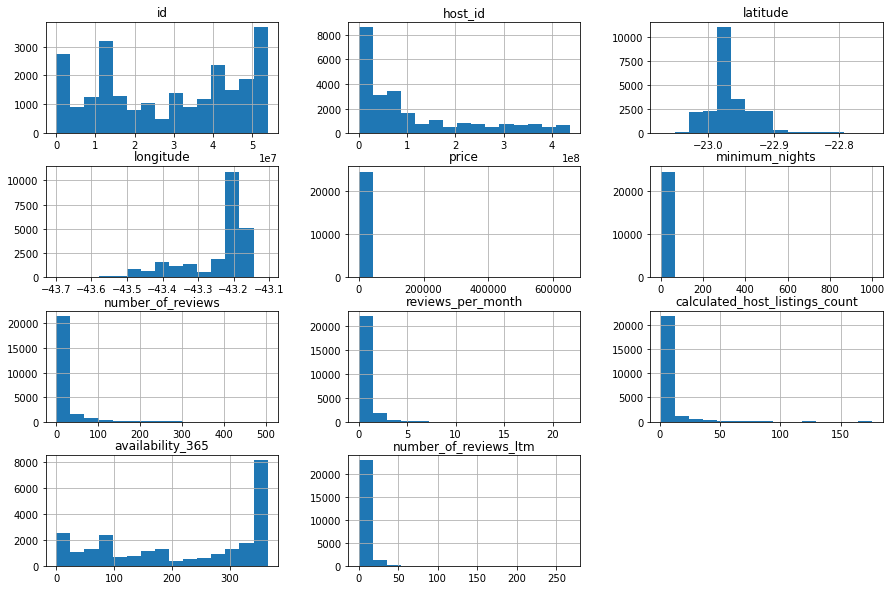

In [323]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [324]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24549.00,24549.00,24549.00,24549.00,24549.00,24549.00,24549.00
mean,1029.59,5.09,14.51,0.44,7.07,218.95,3.58
std,5403.74,21.21,34.05,0.82,20.05,133.73,8.35
min,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,250.00,2.00,0.00,0.00,1.00,86.00,0.00
50%,479.00,3.00,2.00,0.08,1.00,257.00,0.00
75%,900.00,4.00,12.00,0.54,4.00,355.00,3.00
max,650476.00,1000.00,504.00,21.79,176.00,365.00,267.00


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 900, porém seu valor máximo é 650476.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


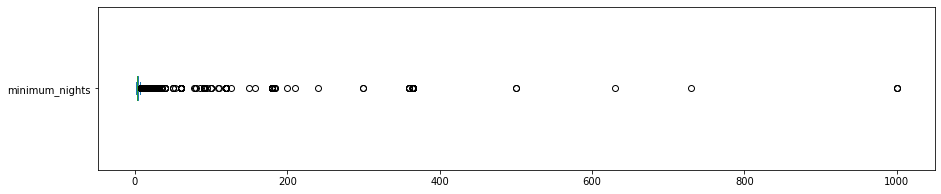

minimum_nights: valores acima de 30:
250 entradas
1.0184%


In [325]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

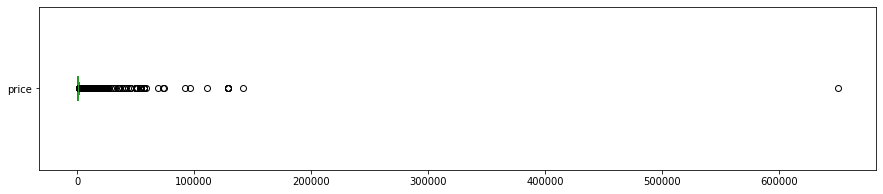


price: valores acima de 1500
2877 entradas
11.7194%


In [326]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

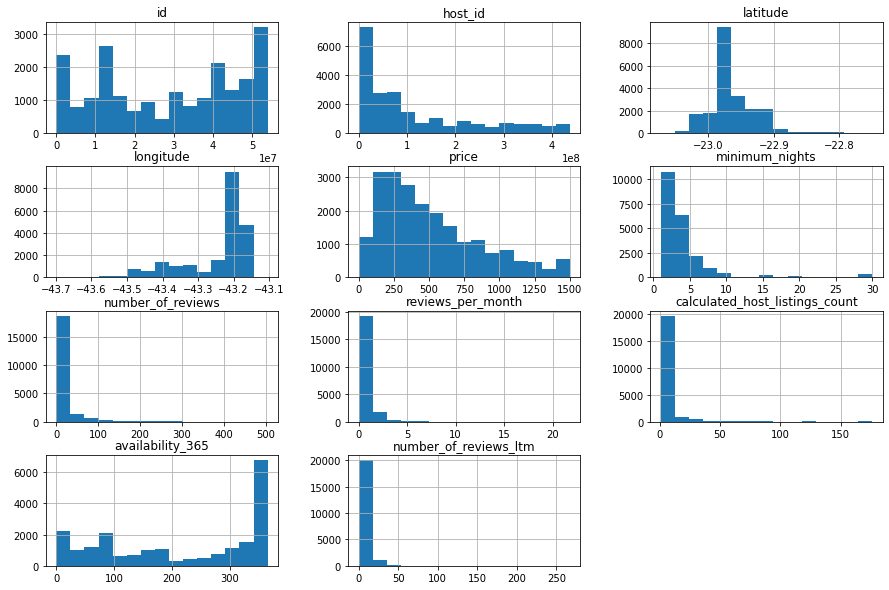

In [327]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [328]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.00,7.02e-02,-0.03,-3.33e-02,1.67e-01,4.14e-02,-1.34e-02
minimum_nights,0.07,1.00e+00,-0.08,-1.33e-01,-5.39e-02,-2.50e-03,-1.14e-01
number_of_reviews,-0.03,-7.55e-02,1.00,6.17e-01,-3.34e-02,-1.38e-01,6.55e-01
reviews_per_month,-0.03,-1.33e-01,0.62,1.00e+00,6.16e-03,-1.78e-01,8.09e-01
calculated_host_listings_count,0.17,-5.39e-02,-0.03,6.16e-03,1.00e+00,4.62e-03,3.44e-03
availability_365,0.04,-2.50e-03,-0.14,-1.78e-01,4.62e-03,1.00e+00,-1.54e-01
number_of_reviews_ltm,-0.01,-1.14e-01,0.66,8.09e-01,3.44e-03,-1.54e-01,1.00e+00


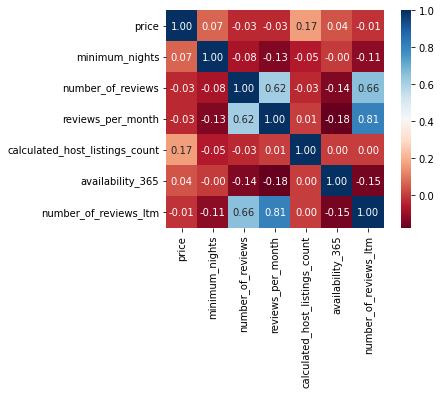

In [329]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

É possível perceber que as maiores correlações positivas são entre as variáveis referentes aos reviews, enquanto as outras variave´si apresentam relações negativamentes baixas.

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [330]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    15724
Private room        5197
Shared room          478
Hotel room            67
Name: room_type, dtype: int64

In [331]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    7.33e-01
Private room       2.42e-01
Shared room        2.23e-02
Hotel room         3.12e-03
Name: room_type, dtype: float64

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [332]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju                 1284.00
Grumari              1079.33
Vaz Lobo              859.50
Leblon                729.36
Manguinhos            684.50
Ipanema               683.85
Lagoa                 677.35
Rocha Miranda         660.50
Pavuna                636.33
Alto da Boa Vista     611.76
Name: price, dtype: float64

Acima, vemos que bairros como Caju, Grumaria, Vaz Lobo, Manguinhos, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [333]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7793,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.86,-43.33,Entire home/apt,1419,15,0,0.0,1,365,0
16810,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86,-43.32,Private room,300,1,0,0.0,1,362,0


In [334]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model as lm
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


pandas.set_option("display.precision", 2)


target_outlier = True
feature_outlier= True
feature_norm   = True
target_norm    = False

target_variable = ['price']

info_variables = ['id', 'name', 'host_id', 'host_name']
categorical_variables = ['room_type','neighbourhood',]

numeric_variables = ['latitude', 'longitude', 'minimum_nights',
                       'number_of_reviews',  'reviews_per_month', 'calculated_host_listings_count',
                       'availability_365', 'number_of_reviews_ltm']

## Tratanto outliers e normalizando dados

### Normalização de Variáveis


In [335]:
if feature_norm:
    log_norm_cols = ['minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']

    df_clean[log_norm_cols] = preprocessing.power_transform(df_clean[log_norm_cols], method='yeo-johnson')

### Remoção Outlier Variáveis


In [336]:
if feature_outlier:
    for cname in numeric_variables:
        lo_lim = np.quantile(df_clean[cname], 0.10)
        up_lim = np.quantile(df_clean[cname], 0.90)
        df_clean.loc[df_clean[cname] < lo_lim, cname] = lo_lim
        df_clean.loc[df_clean[cname] > up_lim, cname] = up_lim

### Normalizando o Alvo

In [337]:
if target_norm:
    df_clean[target_variable] = np.log1p(df_clean[target_variable])

### Codificando Variaveis


In [338]:
if len(categorical_variables):
    cat_data = pandas.get_dummies(df_clean[categorical_variables])
    df_clean = pandas.concat((df_clean.drop(categorical_variables,axis=1), cat_data), axis=1, sort=False)
    df_clean.drop(info_variables, axis=1, inplace=True)
else:
    df_clean = df_clean[numeric_variables+target_variable]

# Aplicando os modelos

## Curva de aprendizado

In [342]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ax=None, ylim=None, cv=None,
                        scoring = 'mse', n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if ax is None:
        plt.figure()
        ax = plt.gca()
        
    ax.set_title(title)
    ax.set_xlabel("Exemplos do Treino")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring=scoring)
   
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Score treino")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Score Validação-cruzada")
    ax.legend(loc="best")

    
    return ax

## Validação Cruzada

In [389]:
# Train Pipeline
X = df_clean.drop(target_variable, axis=1).values
Y = df_clean[target_variable].values

# Dividir 20% dos dados para o conjunto out-of-sample de teste
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X,
                                                                Y.reshape(-1),
                                                                test_size=0.2,
                                                                random_state=0)

# Objeto de validacao cruzada
cvfold = model_selection.KFold(n_splits = 10)

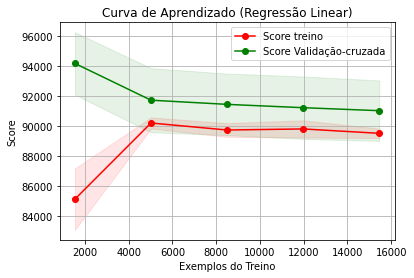

In [390]:
plt.figure()

scorer = metrics.make_scorer(metrics.mean_squared_error)

title = "Curva de Aprendizado (Regressão Linear)"
estimator = lm.RidgeCV()
plot_learning_curve(estimator, title, Xtrain, Ytrain, ax=plt.gca(),
                    cv=cvfold, scoring=scorer, n_jobs=3)

In [391]:
# Crie o pipeline (SimpleImputer + scaler + regressor)
model_pipe = make_pipeline(SimpleImputer(), StandardScaler(),
                               lm.RidgeCV(store_cv_values=True,scoring=scorer))

# Ajuste o modelo
model_pipe.fit(Xtrain, Ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                         scoring=make_scorer(mean_squared_error),
                         store_cv_values=True))])

In [392]:
Yhat = model_pipe.predict(Xtest)

if target_norm:
    Yhat = np.expm1(Yhat)
    Ytest = np.expm1(Ytest)
else:
    Yhat[Yhat<0] = 0


print('Yhat.shape:', Yhat.shape)

Yhat.shape: (4294,)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


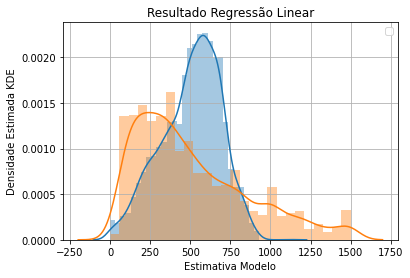

In [394]:
plt.figure()
# idx = Y < 1000
sns.distplot(Yhat)
sns.distplot(Ytest)
plt.title('Resultado Regressão Linear')
plt.ylabel('Densidade Estimada KDE')
plt.xlabel('Estimativa Modelo')
plt.grid()
plt.legend()

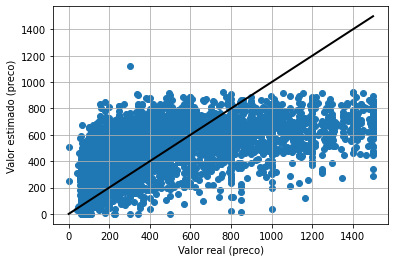

In [395]:
plt.figure()

plt.plot([0, Ytest.max()], [0, Ytest.max()], '-k',lw=2,label='Linha Ideal')
plt.scatter(Ytest, Yhat, label='Regressão linear')
plt.xlabel('Valor real (preco)')
plt.ylabel('Valor estimado (preco)')
plt.grid()

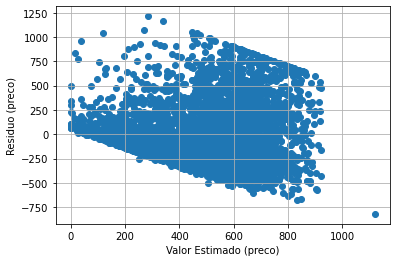

In [396]:
plt.figure()
plt.scatter(Yhat, Ytest - Yhat, label='Regressão linear')
plt.xlabel('Valor Estimado (preco)')
plt.ylabel('Residuo (preco)')
plt.grid()

In [397]:
def mape(y, yhat):
    idx = y != 0
    return np.mean(np.abs((y[idx]-yhat[idx])/ y[idx])) * 100


print('r2  :', metrics.r2_score(Ytest, Yhat))
print('mse :', metrics.mean_squared_error(Ytest, Yhat))
print('msle:', metrics.mean_squared_log_error(Ytest, Yhat))
print('mae :', metrics.mean_absolute_error(Ytest, Yhat))
print('mape:', mape(Ytest, Yhat))

r2  : 0.27765872830522453
mse : 89698.7240031063
msle: 0.5434646910684029
mae : 233.06615389273023
mape: 71.29526447632107


In [398]:


# Crie o pipeline (SimpleImputer + scaler + regressor)
model_pipe = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Ajuste o modelo
model_pipe.fit(Xtrain, Ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [399]:
Yhat = model_pipe.predict(Xtest)

if target_norm:
    Yhat = np.expm1(Yhat)
    Ytrain = np.expm1(Ytrain)
else:
    Yhat[Yhat<0] = 0

print('Yhat.shape:', Yhat.shape)

Yhat.shape: (4294,)


In [400]:
def mape(y, yhat):
  idx = y != 0
  return np.mean(np.abs((y[idx]-yhat[idx])/ y[idx])) * 100


print('r2  :', metrics.r2_score(Ytest, Yhat))
print('mse :', metrics.mean_squared_error(Ytest, Yhat))
print('msle:', metrics.mean_squared_log_error(Ytest, Yhat))
print('mae :', metrics.mean_absolute_error(Ytest, Yhat))
print('mape:', mape(Ytest, Yhat))

r2  : 0.33950531923747485
mse : 82018.75262676626
msle: 0.37930531646712873
mae : 217.21694382829688
mape: 63.44687733271868


# Ajuste de hiperparametros

In [406]:
# Número de árvores na floresta aleatória
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 11)]
# Número de recursos a serem considerados em cada divisão
max_features = ['auto', 'sqrt']
# Número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada nó da folha
min_samples_leaf = [1, 2, 4]
# Método de seleção de amostras para treinar cada árvore
bootstrap = [True, False]
# Criando um random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

## Random Search

In [407]:
# Use um random grid para procurar os melhores hyperparâmetros
from sklearn.model_selection import RandomizedSearchCV

# Random search de parâmetros, usando Validação cruzada de 2 vezes, 
# pesquise em 100 combinações diferentes e use todos os núcleos disponíveis
rf_tuned = RandomizedSearchCV(estimator = model_pipe, 
                               param_distributions = random_grid, 
                               n_iter = 50, cv = 2, verbose=2,
                               random_state = 42, n_jobs = -1, 
                               scoring = 'neg_median_absolute_error')
# Encaixando no nosso modelo
rf_tuned.fit(Xtrain, Ytrain)

rf_tuned.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 208}

## Grid Search

In [410]:
from sklearn.model_selection import GridSearchCV
# Criando a grade de parâmetros com base nos resultados da pesquisa aleatória
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [30, 35, 40], 
    'randomforestregressor__max_features': ['auto'],
    'randomforestregressor__min_samples_leaf': [5],
    'randomforestregressor__min_samples_split': [2, 4, 6],
    'randomforestregressor__n_estimators': [158, 208, 258] 
}

# Instanciando o modelo de pesquisa em grade
grid_search = GridSearchCV(estimator = model_pipe, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Ajustar a pesquisa da grade aos dados
grid_search.fit(Xtrain, Ytrain)

grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 30,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 5,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 158}

In [411]:
# Criando o pipeline (SimpleImputer + scaler + regressor)
model_pipe = make_pipeline(SimpleImputer(), StandardScaler(),
                                      RandomForestRegressor(random_state=42,
                                                            bootstrap = True,
                                                            max_depth = 30,
                                                            max_features = 'auto',
                                                            min_samples_leaf = 5,
                                                            min_samples_split = 2,
                                                            n_estimators = 158))


# Ajuste o modelo
model_pipe.fit(Xtrain, Ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, min_samples_leaf=5,
                                       n_estimators=158, random_state=42))])

In [412]:
Yhat = model_pipe.predict(Xtest)

if target_norm:
    Yhat = np.expm1(Yhat)
    Ytrain = np.expm1(Ytrain)
else:
    Yhat[Yhat<0] = 0

print('Yhat.shape:', Yhat.shape)

Yhat.shape: (4294,)


In [413]:
def mape(y, yhat):
  idx = y != 0
  return np.mean(np.abs((y[idx]-yhat[idx])/ y[idx])) * 100


print('r2  :', metrics.r2_score(Ytest, Yhat))
print('mse :', metrics.mean_squared_error(Ytest, Yhat))
print('msle:', metrics.mean_squared_log_error(Ytest, Yhat))
print('mae :', metrics.mean_absolute_error(Ytest, Yhat))
print('mape:', mape(Ytest, Yhat))

r2  : 0.36042576996319187
mse : 79420.89783264119
msle: 0.36972871369484145
mae : 213.68627397301955
mape: 62.66232759254026
